# Regresión logística - Implementación

## Función logística

$\frac{1}{1 + e^(-x)} $

## Formula 

$ y = \frac{1}{1 + e^{(-\theta_0 + \theta_1 x_1 + \theta_2 x_2)}}$

In [1]:
# Librerias
import matplotlib.pyplot as plt
import numpy as np
import math as math
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_blobs

In [2]:
def logistic(x):
    res = 1 / (1 + np.exp(-1 * x))
    return res

def normaliza(X):
    media = X.mean()
    std   = X.std()
    newX = (X - media) / std
    return newX

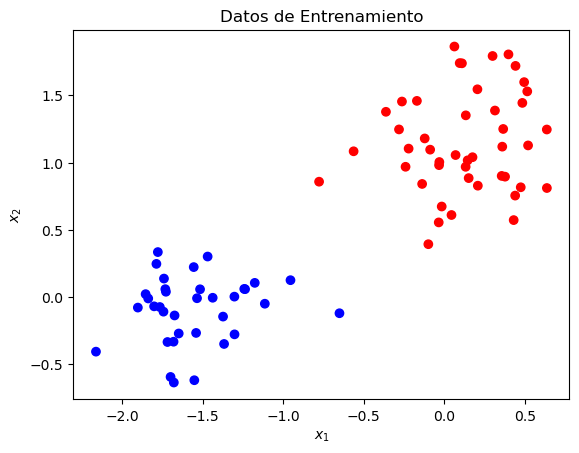

In [3]:
# Datos  
np.random.seed(2)
m = 100 

# Entrenamiento y prueba
X,Y = make_blobs(centers=2,cluster_std=1.0,random_state=3,n_samples=m)
X_t1, X_t2, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

# Normalizamos datos
X_train = normaliza(X_t1)
X_test  = normaliza(X_t2)

colors=['red' if i==0 else 'blue' for i in y_train]
ax=plt.gca()
ax.scatter(X_train[:, 0], X_train[:, 1], c=colors)
plt.xlabel(r'$x_1$')
plt.ylabel(r'$x_2$')
plt.title("Datos de Entrenamiento")
plt.show()


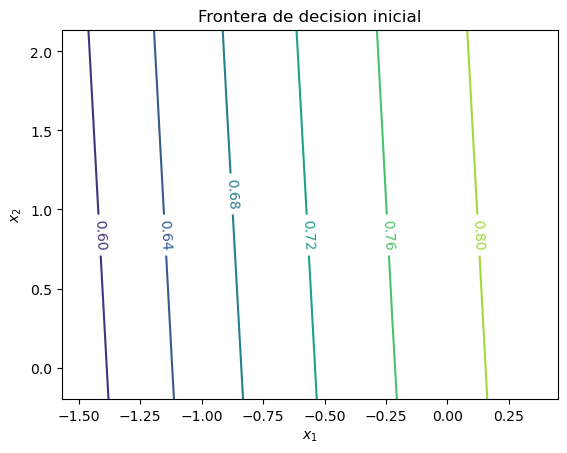

In [4]:
# Inicializar
# Hyperparametro
alpha = 0.1

# Parametros del modelo
theta0 = np.random.rand()
theta1 = np.random.rand()
theta2 = np.random.rand()

# Variables axiliares
maxItera = 100000
i = 0

#para observar el progreso de los parametros abajo 
log0,log1,log2=np.array([theta0]),np.array([theta1]),np.array([theta2])

#para graficar el costo
logE=np.array([])


x1 = np.linspace(X_test[:,0].min(),X_test[:,0].max(),10)
x2 = np.linspace(X_test[:,1].min(),X_test[:,1].max(),10)
db = np.zeros((10,10))
ci = 0
for i in x1:
    cj = 0
    for j in x2:
        prob = logistic(theta0 + theta1*i + theta2*j)
        #print(prob)
        db[ci,cj] = prob
        cj+=1
    ci+=1

fig, ax = plt.subplots()
CS = ax.contour(x1, x2, db)
ax.clabel(CS, inline=True, fontsize=10)
ax.set_xlabel(r'$x_1$')
ax.set_ylabel(r'$x_2$')
ax.set_title('Frontera de decision inicial')
plt.show()

In [5]:
# Ajuste de parámetros - Aprendizaje DG
while i < maxItera:
    # Observar
    #yH = theta0 + theta1*X #+ theta2 * X**2
    #E = yH - Y
    T  = theta0 + theta1*X_train[:,0] + theta2*X_train[:,1]
    yH = logistic(T)
    E  = yH - y_train 
    
    # Costo
    c1   = y_train * np.log(yH)
    Dif  = 1 - yH
    eps  = 1e-8
    Dif  = np.maximum(Dif, eps)
    c2   = (1 - y_train) * np.log(Dif)
    Cost = -1 * (1 / m) * sum( (c1) + (c2) )
    
    # Actualizar
    newt0 = theta0 - alpha * (1/m) * sum(E)
    newt1 = theta1 - alpha * (1/m) * sum(E * X_train[:,0])
    newt2 = theta2 - alpha * (1/m) * sum(E * X_train[:,1])
    
    theta0, theta1, theta2 = newt0, newt1, newt2
    
    
    log0=np.append(log0,theta0)
    log1=np.append(log1,theta1) 
    log2=np.append(log2,theta2) 
    logE=np.append(logE,Cost)
    
    i+= 1  

In [6]:
[theta0 , theta1, theta2]

[-1.5978243471070257, -7.616418671253003, -9.725151902046337]

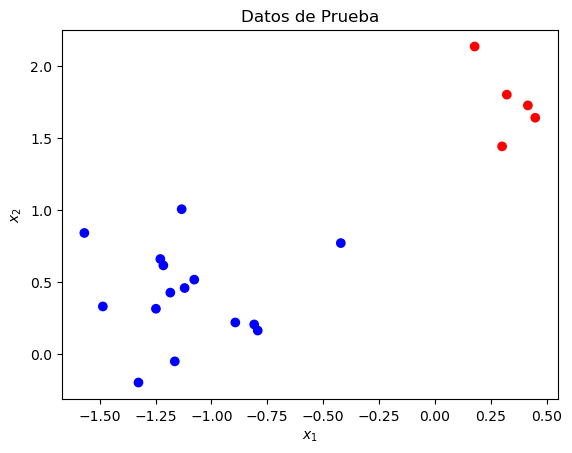

0.898555125092374
4.2521539749658594e-10
0.9299878372145617
0.9467590588621015
1.6555742129545533e-08
4.895857528759694e-11
0.831466908787181
0.9999713938590518
0.9924044192657866
0.8436291897779071
0.9985370712833622
0.0028056150748234534
0.964063261808199
0.9234569357691161
0.9995869983309242
4.2969793412635384e-10
0.060486650384916386
7.702675259211278e-10
0.7951755524049788
0.9567666403107731


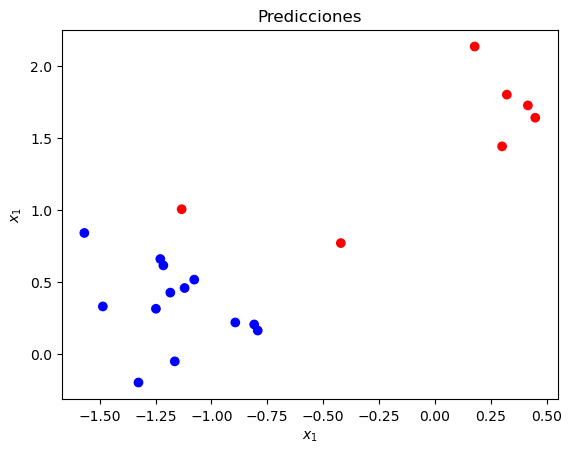

In [16]:
colors=['red' if i==0 else 'blue' for i in y_test]
ax=plt.gca()
ax.scatter(X_test[:, 0], X_test[:, 1], c=colors)
plt.xlabel(r'$x_1$')
plt.ylabel(r'$x_2$')
plt.title("Datos de Prueba")
plt.show()

y_pred = []
for x in X_test:
    #print(x)
    prob = logistic(theta0 + theta1*x[0] + theta2*x[1])
    print(prob)
    if prob >= 0.5:
        # clase 1
        y_pred.append(1)
    else:
        y_pred.append(0)
        
colors=['red' if i==0 else 'blue' for i in y_pred]
ax=plt.gca()
ax.scatter(X_test[:, 0], X_test[:, 1], c=colors)
plt.xlabel(r'$x_1$')
plt.ylabel(r'$x_1$')
plt.title("Predicciones")
plt.show()

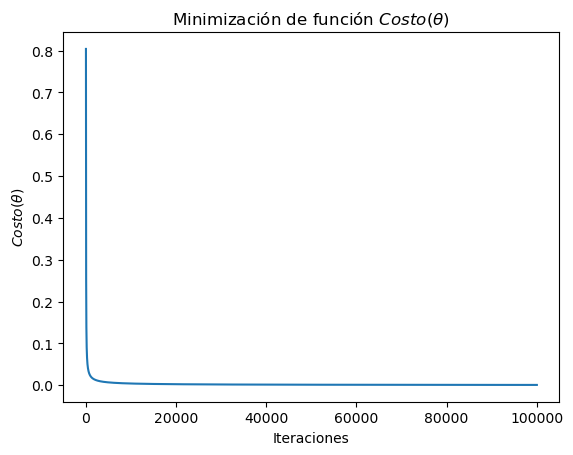

In [8]:
plt.plot(logE)
plt.title("Minimización de función " + r'$Costo(\theta)$')
plt.ylabel(r'$Costo(\theta)$')
plt.xlabel('Iteraciones')
plt.show()

0.999995476719021
0.9999433813962004
0.9992917211890133
0.9912056460273025
0.9000391810868545
0.41836420629858745
0.054338883797685825
0.00456938718110836
0.000366572196820453
2.929394181361281e-05
0.999975055262048
0.999687836298298
0.9961063945872923
0.953352545058538
0.6201569126299559
0.11537891100214055
0.010311913814725801
0.000831670653902933
6.648989172990885e-05
5.311950033955557e-06
0.9998624488307633
0.9982808847291079
0.9788982720571835
0.7874998842442317
0.22842403693704283
0.023103794913106646
0.0018857622354996044
0.0001509082299982402
1.2057159824334899e-05
9.63211415829556e-07
0.9992418957843695
0.9905923433521796
0.8937496015034879
0.40190712623534475
0.050947079576388984
0.004270140651197425
0.00034247090080495547
2.7367324040912325e-05
2.1863266866671597e-06
1.7465769116661296e-07
0.9958334247968893
0.9502319778140809
0.6040051175612405
0.10861463109888822
0.00964023462007571
0.0007770139514088724
6.211710515386821e-05
4.962583372862098e-06
3.964437581624876e-07
3.1

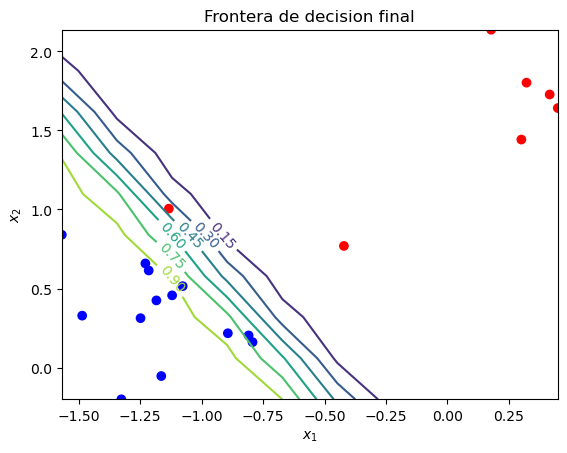

In [15]:
# Frontera de decision

x1 = np.linspace(X_test[:,0].min(),X_test[:,0].max(),10)
x2 = np.linspace(X_test[:,1].min(),X_test[:,1].max(),10)
db = np.zeros((10,10))

ci = 0
for i in x1:
    cj = 0
    for j in x2:
        prob = logistic(theta0 + theta1*i + theta2*j)
        print(prob)
        db[ci,cj] = prob
        cj+=1
    ci+=1

fig, ax = plt.subplots()
CS = ax.contour(x1, x2, db)

ax.scatter(X_test[:, 0], X_test[:, 1], c=colors)
plt.xlabel(r'$x_1$')
plt.ylabel(r'$x_1$')
plt.title("Predicciones")

ax.clabel(CS, inline=True, fontsize=10)
ax.set_xlabel(r'$x_1$')
ax.set_ylabel(r'$x_2$')
ax.set_title('Frontera de decision final')

plt.show()



In [10]:
# Validar
from sklearn.linear_model import LogisticRegression
m1 = LogisticRegression(random_state=0,max_iter=10000).fit(X_train, y_train)
print(m1.predict(X_test))
    

[1 0 1 1 0 0 1 1 1 1 1 0 1 1 1 0 0 0 1 1]


In [11]:
y_pred

[1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1]

In [12]:
y_test

array([1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1])

In [13]:
[m1.intercept_, m1.coef_]

[array([-0.9420718]), array([[-2.48795966, -1.9884524 ]])]

In [14]:
m1.predict_proba(X_test)

array([[0.21576516, 0.78423484],
       [0.99516405, 0.00483595],
       [0.33937966, 0.66062034],
       [0.3293894 , 0.6706106 ],
       [0.98963085, 0.01036915],
       [0.9964416 , 0.0035584 ],
       [0.32888874, 0.67111126],
       [0.05962326, 0.94037674],
       [0.17614621, 0.82385379],
       [0.2973057 , 0.7026943 ],
       [0.10893314, 0.89106686],
       [0.80602479, 0.19397521],
       [0.23884403, 0.76115597],
       [0.28169555, 0.71830445],
       [0.1129422 , 0.8870578 ],
       [0.9955587 , 0.0044413 ],
       [0.53034944, 0.46965056],
       [0.99514925, 0.00485075],
       [0.3088509 , 0.6911491 ],
       [0.29961419, 0.70038581]])